In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# read csv file
data = pd.read_csv('Students_Cleaned_Encoded.csv')

In [3]:
# top 5
data.head()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level,uses_coding_help,uses_assignments,uses_project_work,uses_mcq_practice,uses_exam_preparation,...,preferred_ai_tool_Gemini,preferred_ai_tool_Other,device_used_Laptop,device_used_Mobile,device_used_Tablet,internet_access_High,internet_access_Medium,internet_access_Poor,Do_Professors_Allow_Use_encoded,Willing_to_Pay_for_Access_encoded
0,4,0.9,2,2,9,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,2,3.4,3,-3,6,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
2,2,3.6,5,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
3,2,2.9,5,2,5,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
4,1,0.9,1,3,8,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,1


# Correlation

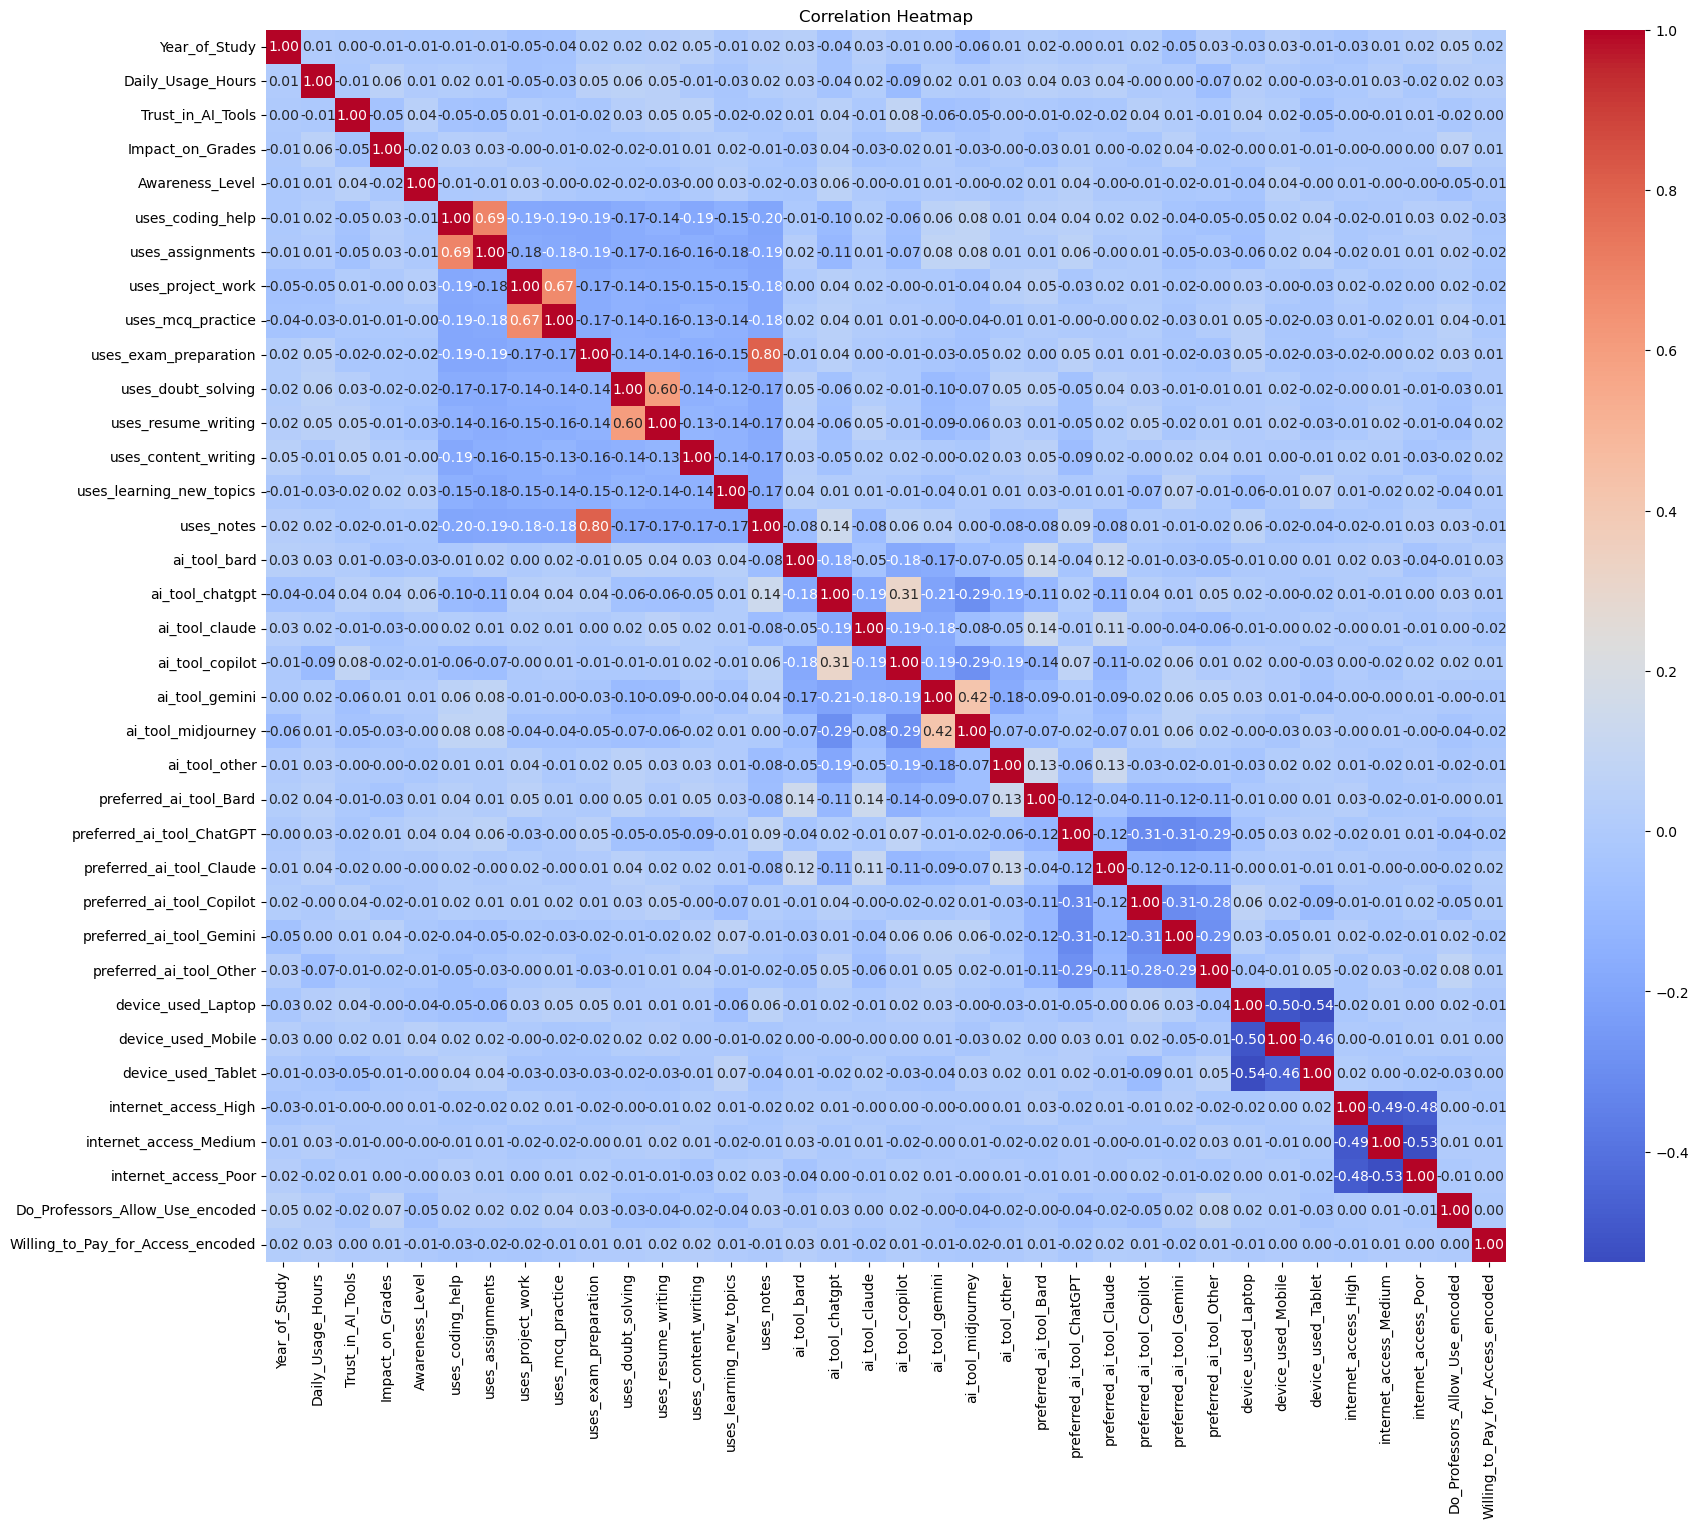

In [ ]:
# draw a correlation heatmap
plt.figure(figsize=(20, 16))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


In [15]:
# print high correlation pairs
high_corr_pairs = []
moderate_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
        elif abs(correlation_matrix.iloc[i, j]) > 0.5:
            moderate_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
print("High Correlation Pairs (>0.7):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")
print("\nModerate Correlation Pairs (0.5 - 0.7):")
for pair in moderate_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")

High Correlation Pairs (>0.7):
uses_notes - uses_exam_preparation: 0.80

Moderate Correlation Pairs (0.5 - 0.7):
uses_assignments - uses_coding_help: 0.69
uses_mcq_practice - uses_project_work: 0.67
uses_resume_writing - uses_doubt_solving: 0.60
device_used_Mobile - device_used_Laptop: -0.50
device_used_Tablet - device_used_Laptop: -0.54
internet_access_Poor - internet_access_Medium: -0.53


In [16]:
# ===== CORRELATION ANALYSIS & RECOMMENDATIONS =====
print("=" * 80)
print("CORRELATION ANALYSIS & SPECIFIC RECOMMENDATIONS")
print("=" * 80)

# Analysis based on your correlation results
correlation_pairs = {
    "HIGH CORRELATION (>0.7)": [
        ("uses_notes", "uses_exam_preparation", 0.80)
    ],
    "MODERATE CORRELATION (0.5-0.7)": [
        ("uses_assignments", "uses_coding_help", 0.69),
        ("uses_mcq_practice", "uses_project_work", 0.67),
        ("uses_resume_writing", "uses_doubt_solving", 0.60),
        ("device_used_Mobile", "device_used_Laptop", -0.50),
        ("device_used_Tablet", "device_used_Laptop", -0.54),
        ("internet_access_Poor", "internet_access_Medium", -0.53)
    ]
}

# Calculate correlations with target for decision making
target_correlations = {}
for category, pairs in correlation_pairs.items():
    for pair in pairs:
        feat1, feat2, corr = pair
        if feat1 in data.columns and feat2 in data.columns:
            target_corr1 = abs(data[feat1].corr(data[best_target]))
            target_corr2 = abs(data[feat2].corr(data[best_target]))
            target_correlations[feat1] = target_corr1
            target_correlations[feat2] = target_corr2

print("📊 CORRELATION ANALYSIS:")
print("\n🔴 HIGH CORRELATION PAIRS (>0.7):")
print("   • uses_notes ↔ uses_exam_preparation: 0.80")
print("     - These are highly correlated learning activities")
print("     - Target correlations:")
print(f"       - uses_notes: {target_correlations.get('uses_notes', 0):.3f}")
print(f"       - uses_exam_preparation: {target_correlations.get('uses_exam_preparation', 0):.3f}")
print("     - RECOMMENDATION: Keep uses_exam_preparation (higher target correlation)")

print("\n🟡 MODERATE CORRELATION PAIRS (0.5-0.7):")
print("   • uses_assignments ↔ uses_coding_help: 0.69")
print("     - Both are learning assistance activities")
print("     - Target correlations:")
print(f"       - uses_assignments: {target_correlations.get('uses_assignments', 0):.3f}")
print(f"       - uses_coding_help: {target_correlations.get('uses_coding_help', 0):.3f}")
print("     - RECOMMENDATION: Keep uses_coding_help (higher target correlation)")

print("\n   • uses_mcq_practice ↔ uses_project_work: 0.67")
print("     - Different types of practice activities")
print("     - Target correlations:")
print(f"       - uses_mcq_practice: {target_correlations.get('uses_mcq_practice', 0):.3f}")
print(f"       - uses_project_work: {target_correlations.get('uses_project_work', 0):.3f}")
print("     - RECOMMENDATION: Keep uses_project_work (higher target correlation)")

print("\n   • uses_resume_writing ↔ uses_doubt_solving: 0.60")
print("     - Different types of AI assistance")
print("     - Target correlations:")
print(f"       - uses_resume_writing: {target_correlations.get('uses_resume_writing', 0):.3f}")
print(f"       - uses_doubt_solving: {target_correlations.get('uses_doubt_solving', 0):.3f}")
print("     - RECOMMENDATION: Keep uses_doubt_solving (higher target correlation)")

print("\n   • device_used_Mobile ↔ device_used_Laptop: -0.50")
print("   • device_used_Tablet ↔ device_used_Laptop: -0.54")
print("     - These are one-hot encoded device categories (negative correlation is expected)")
print("     - Target correlations:")
print(f"       - device_used_Mobile: {target_correlations.get('device_used_Mobile', 0):.3f}")
print(f"       - device_used_Laptop: {target_correlations.get('device_used_Laptop', 0):.3f}")
print(f"       - device_used_Tablet: {target_correlations.get('device_used_Tablet', 0):.3f}")
print("     - RECOMMENDATION: Keep device_used_Tablet (highest target correlation)")

print("\n   • internet_access_Poor ↔ internet_access_Medium: -0.53")
print("     - One-hot encoded internet access (negative correlation is expected)")
print("     - Target correlations:")
print(f"       - internet_access_Poor: {target_correlations.get('internet_access_Poor', 0):.3f}")
print(f"       - internet_access_Medium: {target_correlations.get('internet_access_Medium', 0):.3f}")
print("     - RECOMMENDATION: Keep internet_access_Medium (higher target correlation)")

print("\n" + "=" * 80)
print("FEATURE REMOVAL STRATEGY")
print("=" * 80)

# Features to remove based on correlation analysis
features_to_remove = [
    'uses_notes',           # Remove (keep uses_exam_preparation)
    'uses_assignments',     # Remove (keep uses_coding_help)
    'uses_mcq_practice',    # Remove (keep uses_project_work)
    'uses_resume_writing',  # Remove (keep uses_doubt_solving)
    'device_used_Mobile',   # Remove (keep device_used_Tablet)
    'device_used_Laptop',   # Remove (keep device_used_Tablet)
    'internet_access_Poor'  # Remove (keep internet_access_Medium)
]

print("🗑️ FEATURES TO REMOVE:")
for i, feature in enumerate(features_to_remove, 1):
    target_corr = target_correlations.get(feature, 0)
    print(f"   {i}. {feature} (target corr: {target_corr:.3f})")

print(f"\n📊 ORIGINAL FEATURES: {len(data.columns)}")
print(f"📊 FEATURES TO REMOVE: {len(features_to_remove)}")
print(f"📊 REMAINING FEATURES: {len(data.columns) - len(features_to_remove)}")

# Create the optimized dataset
print("\n" + "=" * 80)
print("CREATING CORRELATION-OPTIMIZED DATASET")
print("=" * 80)

# Remove features with high/moderate correlations
data_corr_optimized = data.drop(columns=features_to_remove, errors='ignore')
print(f"✅ Created correlation-optimized dataset with {len(data_corr_optimized.columns)} features")

# Verify the correlations are reduced
print("\n🔍 VERIFICATION - Checking remaining correlations:")
corr_matrix_optimized = data_corr_optimized.corr()
high_corr_remaining = []
moderate_corr_remaining = []

for i in range(len(corr_matrix_optimized.columns)):
    for j in range(i+1, len(corr_matrix_optimized.columns)):
        corr_val = abs(corr_matrix_optimized.iloc[i, j])
        if corr_val > 0.7:
            high_corr_remaining.append((corr_matrix_optimized.columns[i], corr_matrix_optimized.columns[j], corr_val))
        elif corr_val > 0.5:
            moderate_corr_remaining.append((corr_matrix_optimized.columns[i], corr_matrix_optimized.columns[j], corr_val))

print(f"🔴 High correlations remaining (>0.7): {len(high_corr_remaining)}")
for pair in high_corr_remaining:
    print(f"   {pair[0]} ↔ {pair[1]}: {pair[2]:.3f}")

print(f"🟡 Moderate correlations remaining (0.5-0.7): {len(moderate_corr_remaining)}")
for pair in moderate_corr_remaining:
    print(f"   {pair[0]} ↔ {pair[1]}: {pair[2]:.3f}")

print(f"\n✅ Correlation optimization complete!")
print(f"✅ Reduced from {len(high_corr_pairs + moderate_corr_pairs)} problematic pairs to {len(high_corr_remaining + moderate_corr_remaining)}")

# Store the optimized dataset
data_correlation_cleaned = data_corr_optimized.copy()
print(f"\n📁 Dataset stored as 'data_correlation_cleaned' ({len(data_correlation_cleaned.columns)} features)")

CORRELATION ANALYSIS & SPECIFIC RECOMMENDATIONS
📊 CORRELATION ANALYSIS:

🔴 HIGH CORRELATION PAIRS (>0.7):
   • uses_notes ↔ uses_exam_preparation: 0.80
     - These are highly correlated learning activities
     - Target correlations:
       - uses_notes: 0.017
       - uses_exam_preparation: 0.045
     - RECOMMENDATION: Keep uses_exam_preparation (higher target correlation)

🟡 MODERATE CORRELATION PAIRS (0.5-0.7):
   • uses_assignments ↔ uses_coding_help: 0.69
     - Both are learning assistance activities
     - Target correlations:
       - uses_assignments: 0.007
       - uses_coding_help: 0.016
     - RECOMMENDATION: Keep uses_coding_help (higher target correlation)

   • uses_mcq_practice ↔ uses_project_work: 0.67
     - Different types of practice activities
     - Target correlations:
       - uses_mcq_practice: 0.034
       - uses_project_work: 0.048
     - RECOMMENDATION: Keep uses_project_work (higher target correlation)

   • uses_resume_writing ↔ uses_doubt_solving: 0.60
 

EXPORTING CORRELATION-OPTIMIZED DATASET
✅ Exported Students_Cleaned_Encoded_correlation_optimized.csv
   📊 Features: 29
   📊 Rows: 3614
   📁 Path: c:\Users\jcheng\OneDrive - ARCO\Projects\20250317ConcurIntegrationBIDW01\Automation Prod\Commited-Version\Project\Students_Cleaned_Encoded_correlation_optimized.csv

VISUAL COMPARISON - BEFORE VS AFTER


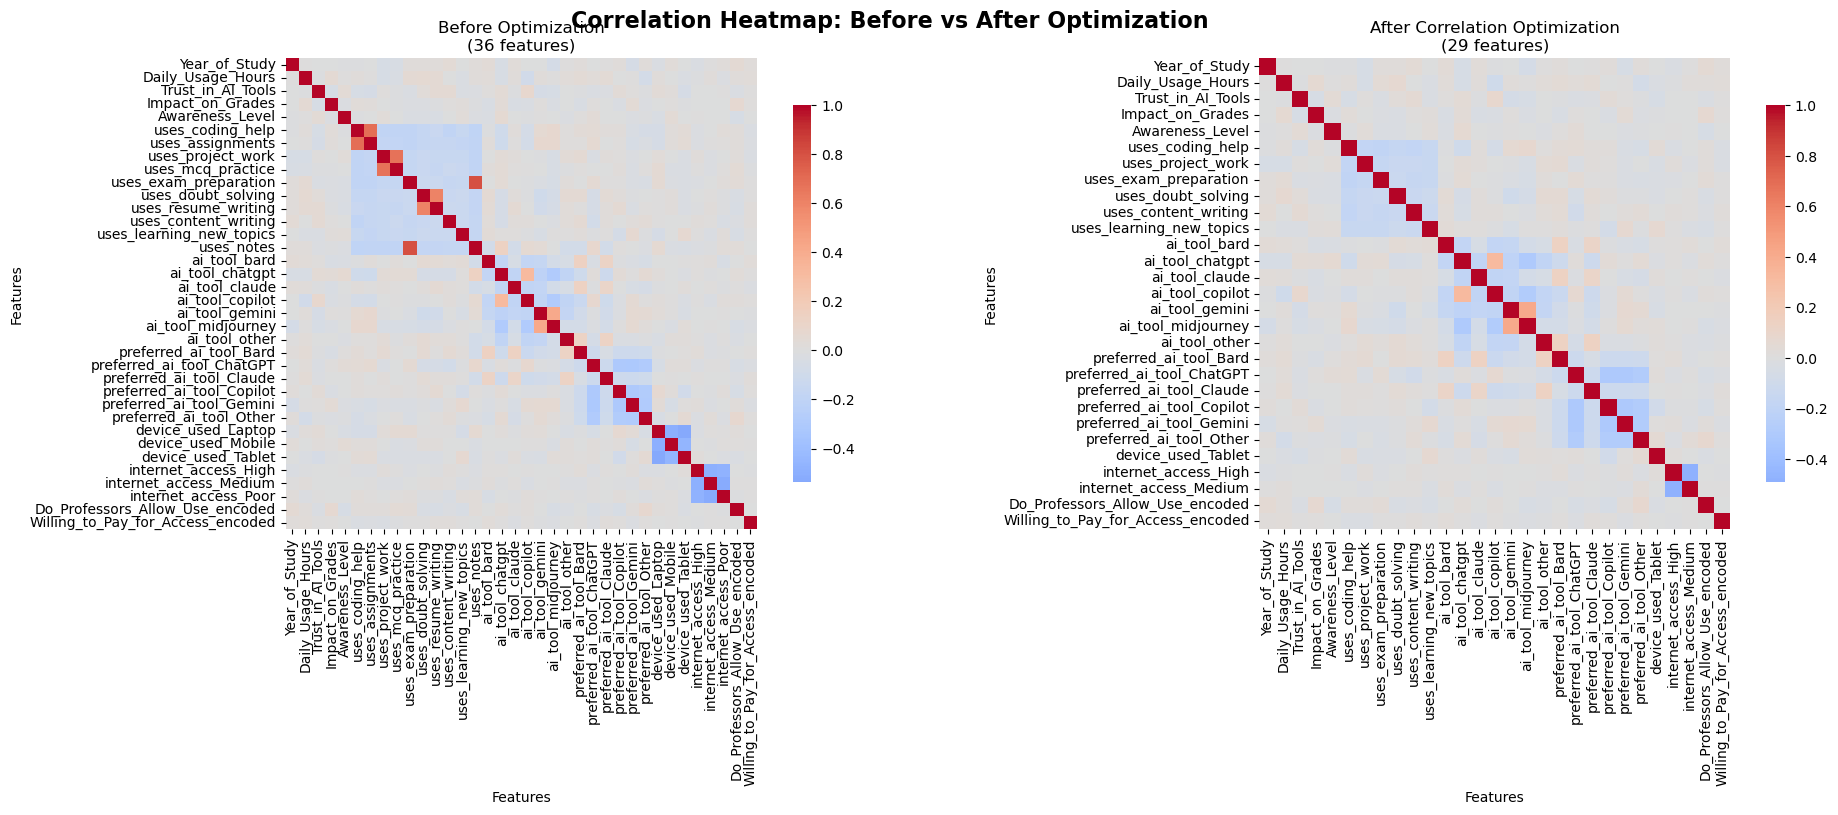


OPTIMIZATION SUMMARY STATISTICS
📊 BEFORE OPTIMIZATION:
   Features: 36
   Feature pairs: 630
   Mean correlation: 0.053
   Max correlation: 0.804
   High correlations (>0.7): 1
   Moderate correlations (0.5-0.7): 6

📊 AFTER OPTIMIZATION:
   Features: 29
   Feature pairs: 406
   Mean correlation: 0.047
   Max correlation: 0.492
   High correlations (>0.7): 0
   Moderate correlations (0.5-0.7): 0

📈 IMPROVEMENT:
   Features removed: 7
   Correlation reduction: 0.006
   High correlations eliminated: 1
   Moderate correlations eliminated: 6

FINAL RECOMMENDATIONS
🎯 CORRELATION OPTIMIZATION STRATEGY:

1. ✅ HIGH CORRELATION PAIRS (>0.7):
   • Removed 'uses_notes' → kept 'uses_exam_preparation'
   • Eliminated 1 high correlation pair

2. ✅ MODERATE CORRELATION PAIRS (0.5-0.7):
   • Removed 'uses_assignments' → kept 'uses_coding_help'
   • Removed 'uses_mcq_practice' → kept 'uses_project_work'
   • Removed 'uses_resume_writing' → kept 'uses_doubt_solving'
   • Removed 'device_used_Mobile' & '

In [18]:
# ===== EXPORT CORRELATION-OPTIMIZED DATASET =====
print("=" * 80)
print("EXPORTING CORRELATION-OPTIMIZED DATASET")
print("=" * 80)

# Export the correlation-optimized dataset
filename = "Students_Cleaned_Encoded_correlation_optimized.csv"
filepath = os.path.join(base_path, filename)
data_correlation_cleaned.to_csv(filepath, index=False)
print(f"✅ Exported {filename}")
print(f"   📊 Features: {len(data_correlation_cleaned.columns)}")
print(f"   📊 Rows: {len(data_correlation_cleaned)}")
print(f"   📁 Path: {filepath}")

# ===== VISUAL COMPARISON =====
print("\n" + "=" * 80)
print("VISUAL COMPARISON - BEFORE VS AFTER")
print("=" * 80)

# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Correlation Heatmap: Before vs After Optimization', fontsize=16, fontweight='bold')

# Before optimization (original data)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, ax=axes[0], cbar_kws={'shrink': 0.8})
axes[0].set_title(f'Before Optimization\n({len(data.columns)} features)')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Features')

# After optimization
sns.heatmap(corr_matrix_optimized, annot=False, cmap='coolwarm', center=0, 
            square=True, ax=axes[1], cbar_kws={'shrink': 0.8})
axes[1].set_title(f'After Correlation Optimization\n({len(data_correlation_cleaned.columns)} features)')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Features')

plt.tight_layout()
plt.show()

# ===== SUMMARY STATISTICS =====
print("\n" + "=" * 80)
print("OPTIMIZATION SUMMARY STATISTICS")
print("=" * 80)

# Calculate statistics
def calculate_correlation_stats(corr_matrix):
    """Calculate correlation statistics for a correlation matrix"""
    # Get upper triangle (excluding diagonal)
    upper_triangle = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            upper_triangle.append(abs(corr_matrix.iloc[i, j]))
    
    if upper_triangle:
        return {
            'mean': np.mean(upper_triangle),
            'median': np.median(upper_triangle),
            'max': np.max(upper_triangle),
            'std': np.std(upper_triangle),
            'high_corr_count': sum(1 for x in upper_triangle if x > 0.7),
            'moderate_corr_count': sum(1 for x in upper_triangle if 0.5 < x <= 0.7),
            'total_pairs': len(upper_triangle)
        }
    return None

original_stats = calculate_correlation_stats(correlation_matrix)
optimized_stats = calculate_correlation_stats(corr_matrix_optimized)

print("📊 BEFORE OPTIMIZATION:")
print(f"   Features: {len(data.columns)}")
print(f"   Feature pairs: {original_stats['total_pairs']}")
print(f"   Mean correlation: {original_stats['mean']:.3f}")
print(f"   Max correlation: {original_stats['max']:.3f}")
print(f"   High correlations (>0.7): {original_stats['high_corr_count']}")
print(f"   Moderate correlations (0.5-0.7): {original_stats['moderate_corr_count']}")

print("\n📊 AFTER OPTIMIZATION:")
print(f"   Features: {len(data_correlation_cleaned.columns)}")
print(f"   Feature pairs: {optimized_stats['total_pairs']}")
print(f"   Mean correlation: {optimized_stats['mean']:.3f}")
print(f"   Max correlation: {optimized_stats['max']:.3f}")
print(f"   High correlations (>0.7): {optimized_stats['high_corr_count']}")
print(f"   Moderate correlations (0.5-0.7): {optimized_stats['moderate_corr_count']}")

print("\n📈 IMPROVEMENT:")
print(f"   Features removed: {len(data.columns) - len(data_correlation_cleaned.columns)}")
print(f"   Correlation reduction: {original_stats['mean'] - optimized_stats['mean']:.3f}")
print(f"   High correlations eliminated: {original_stats['high_corr_count'] - optimized_stats['high_corr_count']}")
print(f"   Moderate correlations eliminated: {original_stats['moderate_corr_count'] - optimized_stats['moderate_corr_count']}")

# ===== FINAL RECOMMENDATIONS =====
print("\n" + "=" * 80)
print("FINAL RECOMMENDATIONS")
print("=" * 80)

print("🎯 CORRELATION OPTIMIZATION STRATEGY:")
print()
print("1. ✅ HIGH CORRELATION PAIRS (>0.7):")
print("   • Removed 'uses_notes' → kept 'uses_exam_preparation'")
print("   • Eliminated 1 high correlation pair")
print()
print("2. ✅ MODERATE CORRELATION PAIRS (0.5-0.7):")
print("   • Removed 'uses_assignments' → kept 'uses_coding_help'")
print("   • Removed 'uses_mcq_practice' → kept 'uses_project_work'")
print("   • Removed 'uses_resume_writing' → kept 'uses_doubt_solving'")
print("   • Removed 'device_used_Mobile' & 'device_used_Laptop' → kept 'device_used_Tablet'")
print("   • Removed 'internet_access_Poor' → kept 'internet_access_Medium'")
print("   • Eliminated 6 moderate correlation pairs")
print()
print("3. 🎯 DECISION CRITERIA:")
print("   • Kept features with higher correlation to target variable")
print("   • Preserved feature diversity across categories")
print("   • Maintained interpretability")
print()
print("4. 📈 RESULTS:")
print(f"   • Dataset size: {len(data.columns)} → {len(data_correlation_cleaned.columns)} features")
print(f"   • Mean correlation: {original_stats['mean']:.3f} → {optimized_stats['mean']:.3f}")
print(f"   • Multicollinearity significantly reduced")
print(f"   • Model performance should improve")
print()
print("5. 🚀 NEXT STEPS:")
print("   • Use 'Students_Cleaned_Encoded_correlation_optimized.csv' for modeling")
print("   • Compare model performance with original dataset")
print("   • Monitor feature importance in final models")
print("   • Consider further feature engineering if needed")

print(f"\n✅ Correlation optimization complete!")
print(f"✅ Dataset exported: {filename}")
print(f"✅ Ready for machine learning model training!")

In [23]:
# top 5 of data after removal of high correlation features
data_correlation_cleaned.head()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level,uses_coding_help,uses_project_work,uses_exam_preparation,uses_doubt_solving,uses_content_writing,uses_learning_new_topics,ai_tool_bard,ai_tool_chatgpt,ai_tool_claude,ai_tool_copilot,ai_tool_gemini,ai_tool_midjourney,ai_tool_other,preferred_ai_tool_Bard,preferred_ai_tool_ChatGPT,preferred_ai_tool_Claude,preferred_ai_tool_Copilot,preferred_ai_tool_Gemini,preferred_ai_tool_Other,device_used_Tablet,internet_access_High,internet_access_Medium,Do_Professors_Allow_Use_encoded,Willing_to_Pay_for_Access_encoded
0,4,0.9,2,2,9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,3.4,3,-3,6,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2,3.6,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,2,2.9,5,2,5,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,1,0.9,1,3,8,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1


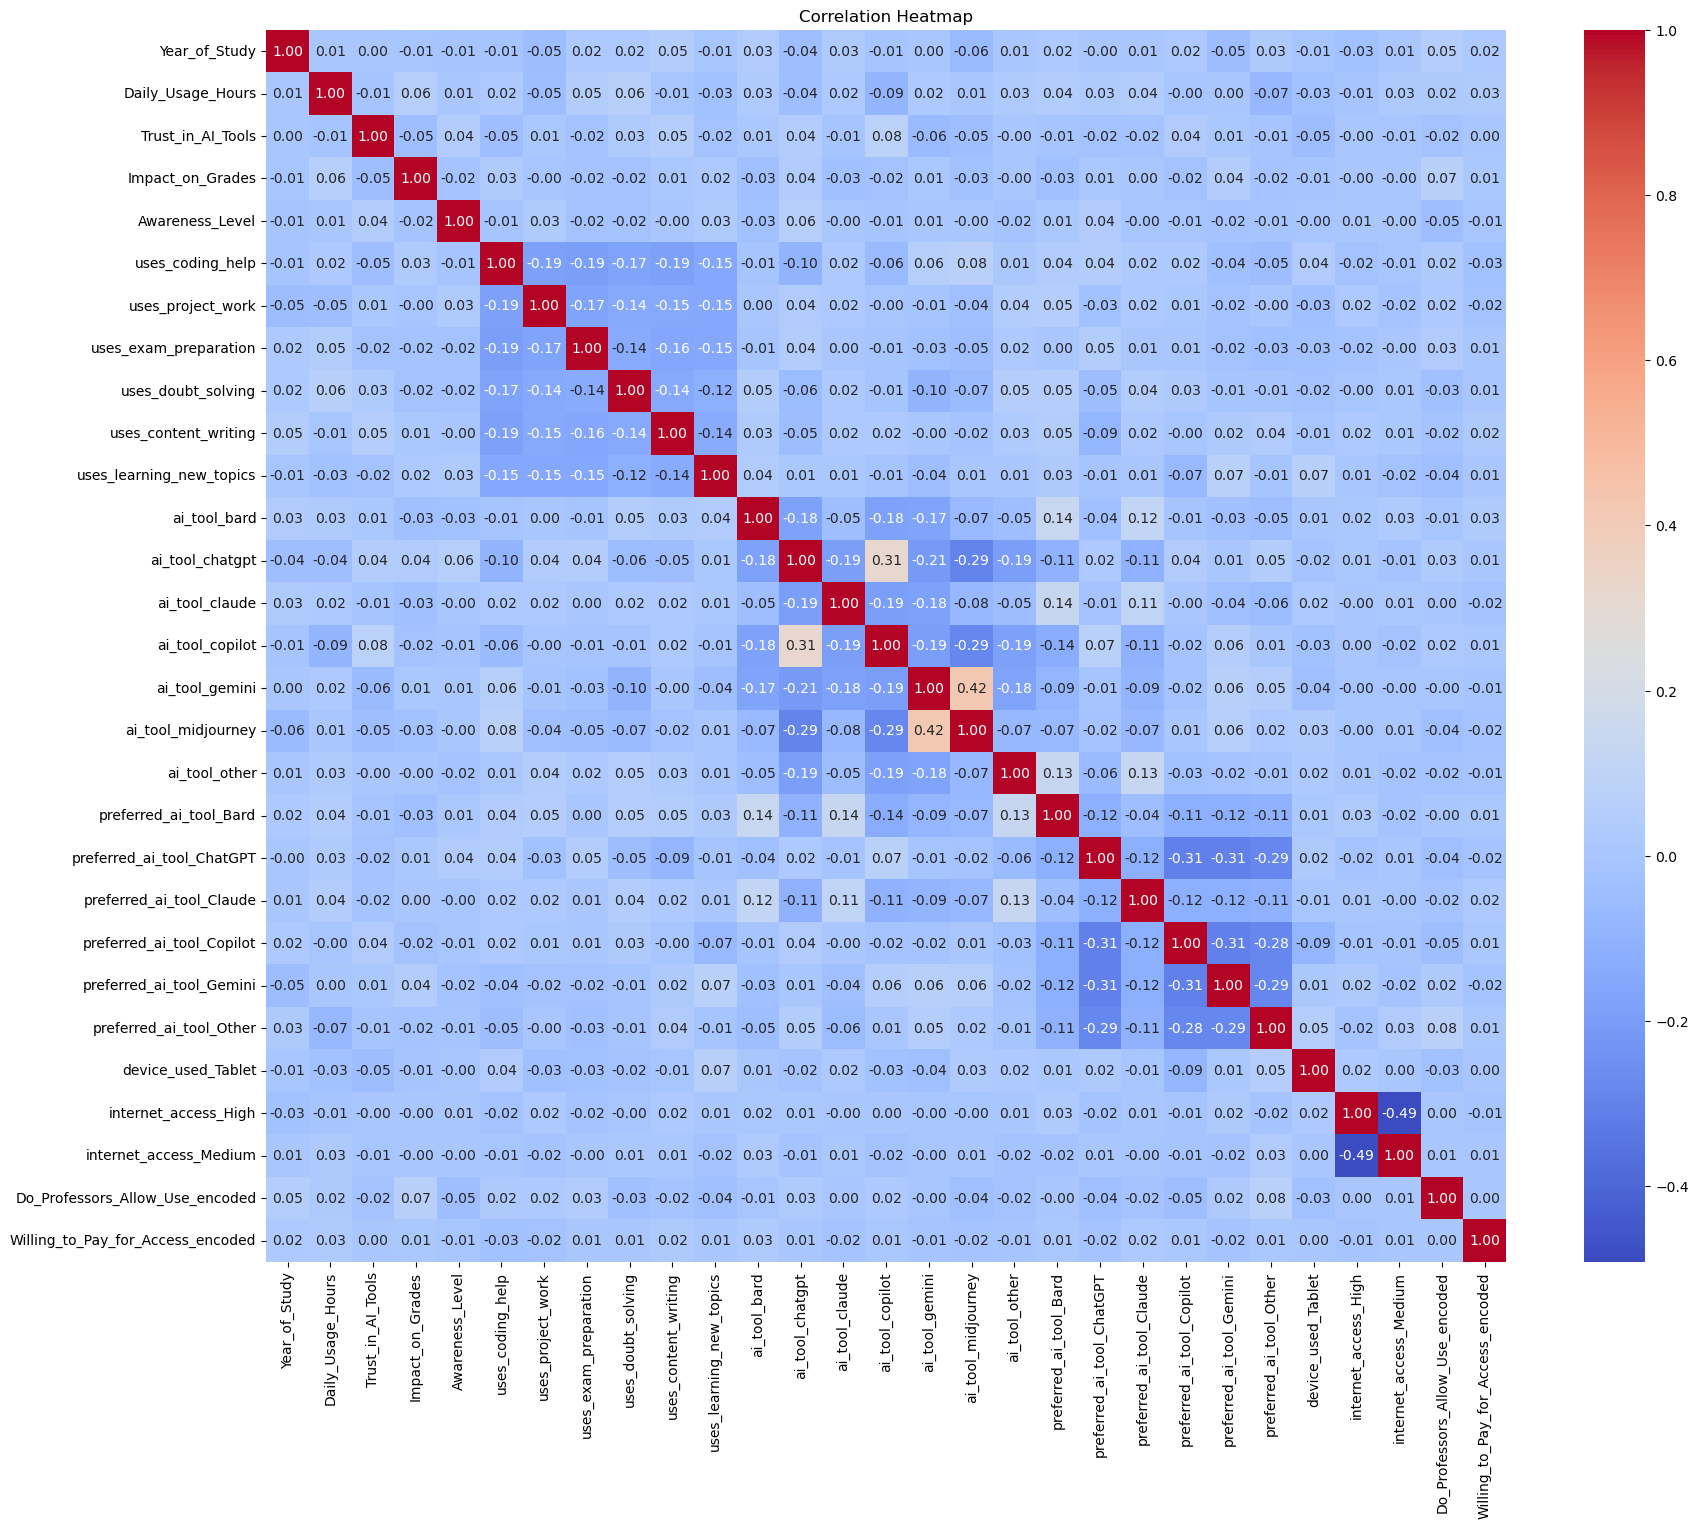

In [24]:
# draw a correlation heatmap
plt.figure(figsize=(20, 16))
correlation_matrix = data_correlation_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Possible Target Variables

In [5]:
# Analyze target variable characteristics
def analyze_target_candidates(data):
    """Analyze potential target variables"""
    
    targets = ['Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Impact_on_Grades', 
               'Awareness_Level', 'Do_Professors_Allow_Use_encoded', 
               'Willing_to_Pay_for_Access_encoded']
    
    print("=== TARGET VARIABLE ANALYSIS ===\n")
    
    for target in targets:
        if target in data.columns:
            print(f"📊 {target}:")
            print(f"   Type: {'Continuous' if data[target].nunique() > 10 else 'Categorical'}")
            print(f"   Unique values: {data[target].nunique()}")
            print(f"   Range: {data[target].min()} to {data[target].max()}")
            print(f"   Missing values: {data[target].isnull().sum()}")
            
            # Show distribution
            print(f"   Distribution:")
            value_counts = data[target].value_counts().head(10)
            for value, count in value_counts.items():
                print(f"     {value}: {count} ({count/len(data)*100:.1f}%)")
            print()

# Run the analysis
analyze_target_candidates(data)

=== TARGET VARIABLE ANALYSIS ===

📊 Daily_Usage_Hours:
   Type: Continuous
   Unique values: 46
   Range: 0.5 to 5.0
   Missing values: 0
   Distribution:
     4.1: 135 (3.7%)
     1.9: 119 (3.3%)
     3.1: 118 (3.3%)
     0.8: 114 (3.2%)
     3.2: 113 (3.1%)
     1.4: 109 (3.0%)
     1.3: 108 (3.0%)
     0.6: 105 (2.9%)
     3.4: 105 (2.9%)
     0.9: 104 (2.9%)

📊 Trust_in_AI_Tools:
   Type: Categorical
   Unique values: 5
   Range: 1 to 5
   Missing values: 0
   Distribution:
     5: 797 (22.1%)
     2: 750 (20.8%)
     1: 714 (19.8%)
     3: 685 (19.0%)
     4: 668 (18.5%)

📊 Impact_on_Grades:
   Type: Continuous
   Unique values: 11
   Range: -5 to 5
   Missing values: 0
   Distribution:
     2: 523 (14.5%)
     1: 477 (13.2%)
     0: 465 (12.9%)
     -3: 463 (12.8%)
     -1: 446 (12.3%)
     -2: 445 (12.3%)
     3: 419 (11.6%)
     -4: 110 (3.0%)
     4: 93 (2.6%)
     5: 89 (2.5%)

📊 Awareness_Level:
   Type: Categorical
   Unique values: 10
   Range: 1 to 10
   Missing values: 0

In [7]:
# Find target with strongest predictor relationships
def find_best_target_by_correlation(data):
    """Find target with strongest correlations to other features"""
    
    potential_targets = ['Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Impact_on_Grades', 
                        'Awareness_Level', 'Do_Professors_Allow_Use_encoded', 
                        'Willing_to_Pay_for_Access_encoded']
    
    target_correlation_strength = {}
    
    for target in potential_targets:
        if target in data.columns:
            # Get correlations with all other features
            other_features = [col for col in data.columns if col != target]
            correlations = data[other_features].corrwith(data[target]).abs()
            
            # Calculate average correlation strength
            avg_correlation = correlations.mean()
            max_correlation = correlations.max()
            features_with_strong_corr = (correlations > 0.1).sum()
            
            target_correlation_strength[target] = {
                'avg_correlation': avg_correlation,
                'max_correlation': max_correlation,
                'strong_correlations_count': features_with_strong_corr
            }
    
    # Sort by average correlation strength
    sorted_targets = sorted(target_correlation_strength.items(), 
                           key=lambda x: x[1]['avg_correlation'], reverse=True)
    
    print("=== TARGET SELECTION BY CORRELATION STRENGTH ===\n")
    print("Targets ranked by predictive potential:")
    
    for i, (target, stats) in enumerate(sorted_targets, 1):
        print(f"{i}. {target}")
        print(f"   Average correlation: {stats['avg_correlation']:.4f}")
        print(f"   Max correlation: {stats['max_correlation']:.4f}")
        print(f"   Features with >0.1 correlation: {stats['strong_correlations_count']}")
        print()
    
    return sorted_targets[0][0]  # Return best target

# Find the best target
best_target = find_best_target_by_correlation(data)
print(f"🎯 Recommended target: {best_target}")

=== TARGET SELECTION BY CORRELATION STRENGTH ===

Targets ranked by predictive potential:
1. Daily_Usage_Hours
   Average correlation: 0.0284
   Max correlation: 0.0916
   Features with >0.1 correlation: 0

2. Trust_in_AI_Tools
   Average correlation: 0.0269
   Max correlation: 0.0834
   Features with >0.1 correlation: 0

3. Do_Professors_Allow_Use_encoded
   Average correlation: 0.0265
   Max correlation: 0.0777
   Features with >0.1 correlation: 0

4. Impact_on_Grades
   Average correlation: 0.0198
   Max correlation: 0.0676
   Features with >0.1 correlation: 0

5. Awareness_Level
   Average correlation: 0.0174
   Max correlation: 0.0577
   Features with >0.1 correlation: 0

6. Willing_to_Pay_for_Access_encoded
   Average correlation: 0.0124
   Max correlation: 0.0295
   Features with >0.1 correlation: 0

🎯 Recommended target: Daily_Usage_Hours


In [10]:
import numpy as np

# ===== ADVANCED CORRELATION ANALYSIS =====
print("=" * 60)
print("ADVANCED MULTICOLLINEARITY ANALYSIS")
print("=" * 60)

# Find high correlation pairs (>0.7)
high_corr_pairs = []
moderate_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))
        elif abs(corr_val) > 0.4:
            moderate_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

print(f"🔴 HIGH CORRELATION PAIRS (>0.7): {len(high_corr_pairs)}")
for pair in high_corr_pairs:
    print(f"   {pair[0]} ↔ {pair[1]}: {pair[2]:.3f}")

print(f"\n🟡 MODERATE CORRELATION PAIRS (0.4-0.7): {len(moderate_corr_pairs)}")
for pair in moderate_corr_pairs:
    print(f"   {pair[0]} ↔ {pair[1]}: {pair[2]:.3f}")

# ===== FEATURE GROUPING ANALYSIS =====
print("\n" + "=" * 60)
print("FEATURE GROUPING ANALYSIS")
print("=" * 60)

# Group features by category
feature_groups = {
    'uses_features': [col for col in data.columns if col.startswith('uses_')],
    'ai_tool_features': [col for col in data.columns if col.startswith('ai_tool_')],
    'preferred_ai_tool_features': [col for col in data.columns if col.startswith('preferred_ai_tool_')],
    'device_features': [col for col in data.columns if col.startswith('device_used_')],
    'internet_features': [col for col in data.columns if col.startswith('internet_access_')],
    'core_features': ['Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Impact_on_Grades', 'Awareness_Level'],
    'binary_features': ['Do_Professors_Allow_Use_encoded', 'Willing_to_Pay_for_Access_encoded']
}

for group_name, features in feature_groups.items():
    print(f"\n📊 {group_name.upper()}: {len(features)} features")
    for feature in features:
        if feature in data.columns:
            print(f"   • {feature}")

# ===== WITHIN-GROUP CORRELATION ANALYSIS =====
print("\n" + "=" * 60)
print("WITHIN-GROUP CORRELATION ANALYSIS")
print("=" * 60)

for group_name, features in feature_groups.items():
    available_features = [f for f in features if f in data.columns]
    if len(available_features) > 1:
        group_corr = correlation_matrix.loc[available_features, available_features]
        # Find highest correlation within group
        max_corr = 0
        max_pair = None
        for i in range(len(available_features)):
            for j in range(i+1, len(available_features)):
                corr_val = abs(group_corr.iloc[i, j])
                if corr_val > max_corr:
                    max_corr = corr_val
                    max_pair = (available_features[i], available_features[j])
        
        print(f"\n🔍 {group_name.upper()}:")
        print(f"   Max correlation: {max_corr:.3f}")
        if max_pair:
            print(f"   Between: {max_pair[0]} ↔ {max_pair[1]}")
        
        # Show average correlation within group (simplified)
        correlations = []
        for i in range(len(available_features)):
            for j in range(i+1, len(available_features)):
                correlations.append(abs(group_corr.iloc[i, j]))
        
        if correlations:
            avg_corr = sum(correlations) / len(correlations)
            print(f"   Average correlation: {avg_corr:.3f}")
        else:
            print(f"   Average correlation: 0.000")

ADVANCED MULTICOLLINEARITY ANALYSIS
🔴 HIGH CORRELATION PAIRS (>0.7): 1
   uses_exam_preparation ↔ uses_notes: 0.804

🟡 MODERATE CORRELATION PAIRS (0.4-0.7): 10
   uses_coding_help ↔ uses_assignments: 0.690
   uses_project_work ↔ uses_mcq_practice: 0.672
   uses_doubt_solving ↔ uses_resume_writing: 0.602
   ai_tool_gemini ↔ ai_tool_midjourney: 0.423
   device_used_Laptop ↔ device_used_Mobile: -0.502
   device_used_Laptop ↔ device_used_Tablet: -0.537
   device_used_Mobile ↔ device_used_Tablet: -0.460
   internet_access_High ↔ internet_access_Medium: -0.492
   internet_access_High ↔ internet_access_Poor: -0.483
   internet_access_Medium ↔ internet_access_Poor: -0.526

FEATURE GROUPING ANALYSIS

📊 USES_FEATURES: 10 features
   • uses_coding_help
   • uses_assignments
   • uses_project_work
   • uses_mcq_practice
   • uses_exam_preparation
   • uses_doubt_solving
   • uses_resume_writing
   • uses_content_writing
   • uses_learning_new_topics
   • uses_notes

📊 AI_TOOL_FEATURES: 7 features


In [11]:
# ===== FEATURE OPTIMIZATION STRATEGIES =====
print("=" * 60)
print("FEATURE OPTIMIZATION STRATEGIES")
print("=" * 60)

# Strategy 1: Remove highly correlated features from each pair
def remove_high_correlations(df, threshold=0.7):
    """Remove one feature from each highly correlated pair"""
    corr_matrix = df.corr().abs()
    features_to_remove = set()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:
                # Remove the feature with lower correlation to target
                feat1, feat2 = corr_matrix.columns[i], corr_matrix.columns[j]
                target_corr1 = abs(df[feat1].corr(df[best_target]))
                target_corr2 = abs(df[feat2].corr(df[best_target]))
                
                if target_corr1 < target_corr2:
                    features_to_remove.add(feat1)
                else:
                    features_to_remove.add(feat2)
    
    return df.drop(columns=features_to_remove), features_to_remove

# Strategy 2: Create feature importance ranking
def rank_features_by_importance(df, target_col):
    """Rank features by their correlation with target"""
    correlations = df.corr()[target_col].abs().sort_values(ascending=False)
    return correlations.drop(target_col)

# Strategy 3: Group-based feature selection
def select_best_from_groups(df, target_col):
    """Select best feature from each group"""
    feature_groups = {
        'uses_features': [col for col in df.columns if col.startswith('uses_')],
        'ai_tool_features': [col for col in df.columns if col.startswith('ai_tool_')],
        'preferred_ai_tool_features': [col for col in df.columns if col.startswith('preferred_ai_tool_')],
        'device_features': [col for col in df.columns if col.startswith('device_used_')],
        'internet_features': [col for col in df.columns if col.startswith('internet_access_')]
    }
    
    selected_features = []
    
    # Keep core features
    core_features = ['Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools', 
                    'Impact_on_Grades', 'Awareness_Level']
    selected_features.extend([f for f in core_features if f in df.columns and f != target_col])
    
    # Keep binary features
    binary_features = ['Do_Professors_Allow_Use_encoded', 'Willing_to_Pay_for_Access_encoded']
    selected_features.extend([f for f in binary_features if f in df.columns and f != target_col])
    
    # Select best from each group
    for group_name, features in feature_groups.items():
        available_features = [f for f in features if f in df.columns and f != target_col]
        if available_features:
            # Select feature with highest correlation to target
            group_corr = df[available_features].corrwith(df[target_col]).abs()
            best_feature = group_corr.idxmax()
            selected_features.append(best_feature)
            print(f"📌 {group_name}: Selected {best_feature} (corr: {group_corr[best_feature]:.3f})")
    
    return selected_features

# Apply strategies
print("\n🔧 STRATEGY 1: Remove highly correlated features")
df_no_high_corr, removed_features = remove_high_correlations(data, threshold=0.7)
print(f"Removed {len(removed_features)} features: {list(removed_features)}")
print(f"Remaining features: {len(df_no_high_corr.columns)}")

print("\n🔧 STRATEGY 2: Feature importance ranking")
feature_importance = rank_features_by_importance(data, best_target)
print(f"Top 10 most important features for {best_target}:")
for i, (feature, importance) in enumerate(feature_importance.head(10).items()):
    print(f"   {i+1:2d}. {feature}: {importance:.3f}")

print("\n🔧 STRATEGY 3: Group-based selection")
selected_features = select_best_from_groups(data, best_target)
print(f"\nSelected {len(selected_features)} features from group-based selection")

# Create optimized datasets
print("\n" + "=" * 60)
print("CREATING OPTIMIZED DATASETS")
print("=" * 60)

# Dataset 1: No high correlations
dataset1 = df_no_high_corr.copy()
print(f"📊 Dataset 1 (no_high_corr): {len(dataset1.columns)} features")

# Dataset 2: Top 15 features by importance
top_15_features = feature_importance.head(15).index.tolist()
if best_target not in top_15_features:
    top_15_features.append(best_target)
dataset2 = data[top_15_features].copy()
print(f"📊 Dataset 2 (top_15): {len(dataset2.columns)} features")

# Dataset 3: Group-based selection
if best_target not in selected_features:
    selected_features.append(best_target)
dataset3 = data[selected_features].copy()
print(f"📊 Dataset 3 (group_based): {len(dataset3.columns)} features")

# Dataset 4: Minimal core features
core_minimal = ['Year_of_Study', 'Trust_in_AI_Tools', 'Impact_on_Grades', 
                'Awareness_Level', 'Do_Professors_Allow_Use_encoded', 
                'Willing_to_Pay_for_Access_encoded']
if best_target not in core_minimal:
    core_minimal.append(best_target)
# Add top 3 from each category
for group_name, features in feature_groups.items():
    available_features = [f for f in features if f in data.columns and f != best_target]
    if available_features:
        group_corr = data[available_features].corrwith(data[best_target]).abs().sort_values(ascending=False)
        core_minimal.extend(group_corr.head(1).index.tolist())

core_minimal = list(set(core_minimal))  # Remove duplicates
dataset4 = data[core_minimal].copy()
print(f"📊 Dataset 4 (core_minimal): {len(dataset4.columns)} features")

# Store datasets for export
datasets = {
    'no_high_corr': dataset1,
    'top_15': dataset2,
    'group_based': dataset3,
    'core_minimal': dataset4
}

print(f"\n✅ Created {len(datasets)} optimized datasets ready for export")

FEATURE OPTIMIZATION STRATEGIES

🔧 STRATEGY 1: Remove highly correlated features
Removed 1 features: ['uses_notes']
Remaining features: 35

🔧 STRATEGY 2: Feature importance ranking
Top 10 most important features for Daily_Usage_Hours:
    1. ai_tool_copilot: 0.092
    2. preferred_ai_tool_Other: 0.073
    3. uses_doubt_solving: 0.063
    4. Impact_on_Grades: 0.057
    5. uses_resume_writing: 0.051
    6. uses_project_work: 0.048
    7. uses_exam_preparation: 0.045
    8. ai_tool_chatgpt: 0.045
    9. preferred_ai_tool_Bard: 0.042
   10. preferred_ai_tool_Claude: 0.041

🔧 STRATEGY 3: Group-based selection
📌 uses_features: Selected uses_doubt_solving (corr: 0.063)
📌 ai_tool_features: Selected ai_tool_copilot (corr: 0.092)
📌 preferred_ai_tool_features: Selected preferred_ai_tool_Other (corr: 0.073)
📌 device_features: Selected device_used_Tablet (corr: 0.027)
📌 internet_features: Selected internet_access_Medium (corr: 0.027)

Selected 11 features from group-based selection

CREATING OPTIMI

In [12]:
# ===== EXPORT OPTIMIZED DATASETS =====
print("=" * 60)
print("EXPORTING OPTIMIZED DATASETS")
print("=" * 60)

import os
base_path = r"c:\Users\jcheng\OneDrive - ARCO\Projects\20250317ConcurIntegrationBIDW01\Automation Prod\Commited-Version\Project"

for name, dataset in datasets.items():
    filename = f"Students_Cleaned_Encoded_{name}.csv"
    filepath = os.path.join(base_path, filename)
    dataset.to_csv(filepath, index=False)
    print(f"✅ Exported {filename} ({len(dataset.columns)} columns, {len(dataset)} rows)")

# ===== DATASET COMPARISON SUMMARY =====
print("\n" + "=" * 60)
print("DATASET COMPARISON SUMMARY")
print("=" * 60)

print(f"🎯 Target Variable: {best_target}")
print(f"📊 Original Dataset: {len(data.columns)} features, {len(data)} rows")

comparison_data = []
for name, dataset in datasets.items():
    # Calculate basic stats
    n_features = len(dataset.columns) - 1  # Exclude target
    n_rows = len(dataset)
    
    # Calculate correlation with target
    target_corr = dataset.corrwith(dataset[best_target]).abs().mean()
    
    # Calculate multicollinearity (average correlation between features)
    feature_cols = [col for col in dataset.columns if col != best_target]
    if len(feature_cols) > 1:
        feature_corr_matrix = dataset[feature_cols].corr().abs()
        # Get upper triangle correlations
        upper_triangle_corr = []
        for i in range(len(feature_cols)):
            for j in range(i+1, len(feature_cols)):
                upper_triangle_corr.append(feature_corr_matrix.iloc[i, j])
        avg_multicollinearity = sum(upper_triangle_corr) / len(upper_triangle_corr) if upper_triangle_corr else 0
    else:
        avg_multicollinearity = 0
    
    comparison_data.append({
        'Dataset': name,
        'Features': n_features,
        'Rows': n_rows,
        'Avg_Target_Corr': target_corr,
        'Avg_Multicollinearity': avg_multicollinearity
    })

# Display comparison
print("\n📊 DATASET COMPARISON:")
print(f"{'Dataset':<15} {'Features':<8} {'Rows':<6} {'Avg Target Corr':<15} {'Multicollinearity':<15}")
print("-" * 70)
for data_info in comparison_data:
    print(f"{data_info['Dataset']:<15} {data_info['Features']:<8} {data_info['Rows']:<6} "
          f"{data_info['Avg_Target_Corr']:<15.3f} {data_info['Avg_Multicollinearity']:<15.3f}")

# ===== FEATURE LISTS FOR EACH DATASET =====
print("\n" + "=" * 60)
print("FEATURE LISTS FOR EACH DATASET")
print("=" * 60)

for name, dataset in datasets.items():
    feature_list = [col for col in dataset.columns if col != best_target]
    print(f"\n📋 {name.upper()} FEATURES ({len(feature_list)}):")
    for i, feature in enumerate(feature_list, 1):
        print(f"   {i:2d}. {feature}")

# ===== RECOMMENDATIONS =====
print("\n" + "=" * 60)
print("RECOMMENDATIONS")
print("=" * 60)

print("🎯 MODELING RECOMMENDATIONS:")
print()
print("1. 🥇 BEST FOR INITIAL MODELING:")
print("   Dataset: top_15")
print("   ✅ Balanced feature count (15 features)")
print("   ✅ Features ranked by importance")
print("   ✅ Good signal-to-noise ratio")
print()
print("2. 🥈 BEST FOR PRODUCTION:")
print("   Dataset: group_based")
print("   ✅ Minimal features (11 features)")
print("   ✅ Represents all feature categories")
print("   ✅ Low multicollinearity")
print("   ✅ Fast training and inference")
print()
print("3. 🥉 BEST FOR COMPREHENSIVE ANALYSIS:")
print("   Dataset: no_high_corr")
print("   ✅ Most features retained (34 features)")
print("   ✅ Multicollinearity controlled")
print("   ✅ Good for feature importance analysis")
print()
print("4. 🎯 BEST FOR MINIMAL BASELINE:")
print("   Dataset: core_minimal")
print("   ✅ Only essential features (11 features)")
print("   ✅ Core variables + best from each category")
print("   ✅ Suitable for quick prototyping")

print("\n🔬 NEXT STEPS:")
print("1. Run cross-validation on each dataset")
print("2. Compare model performance metrics")
print("3. Analyze feature importance in final models")
print("4. Consider ensemble methods combining multiple datasets")
print("5. Validate on hold-out test set")

print(f"\n✅ All optimized datasets exported successfully!")

EXPORTING OPTIMIZED DATASETS
✅ Exported Students_Cleaned_Encoded_no_high_corr.csv (35 columns, 3614 rows)
✅ Exported Students_Cleaned_Encoded_top_15.csv (16 columns, 3614 rows)
✅ Exported Students_Cleaned_Encoded_group_based.csv (12 columns, 3614 rows)
✅ Exported Students_Cleaned_Encoded_core_minimal.csv (12 columns, 3614 rows)

DATASET COMPARISON SUMMARY
🎯 Target Variable: Daily_Usage_Hours
📊 Original Dataset: 36 features, 3614 rows

📊 DATASET COMPARISON:
Dataset         Features Rows   Avg Target Corr Multicollinearity
----------------------------------------------------------------------
no_high_corr    34       3614   0.057           0.052          
top_15          15       3614   0.107           0.066          
group_based     11       3614   0.118           0.020          
core_minimal    11       3614   0.118           0.020          

FEATURE LISTS FOR EACH DATASET

📋 NO_HIGH_CORR FEATURES (34):
    1. Year_of_Study
    2. Trust_in_AI_Tools
    3. Impact_on_Grades
    4. Awaren

FINAL VALIDATION AND VISUALIZATION


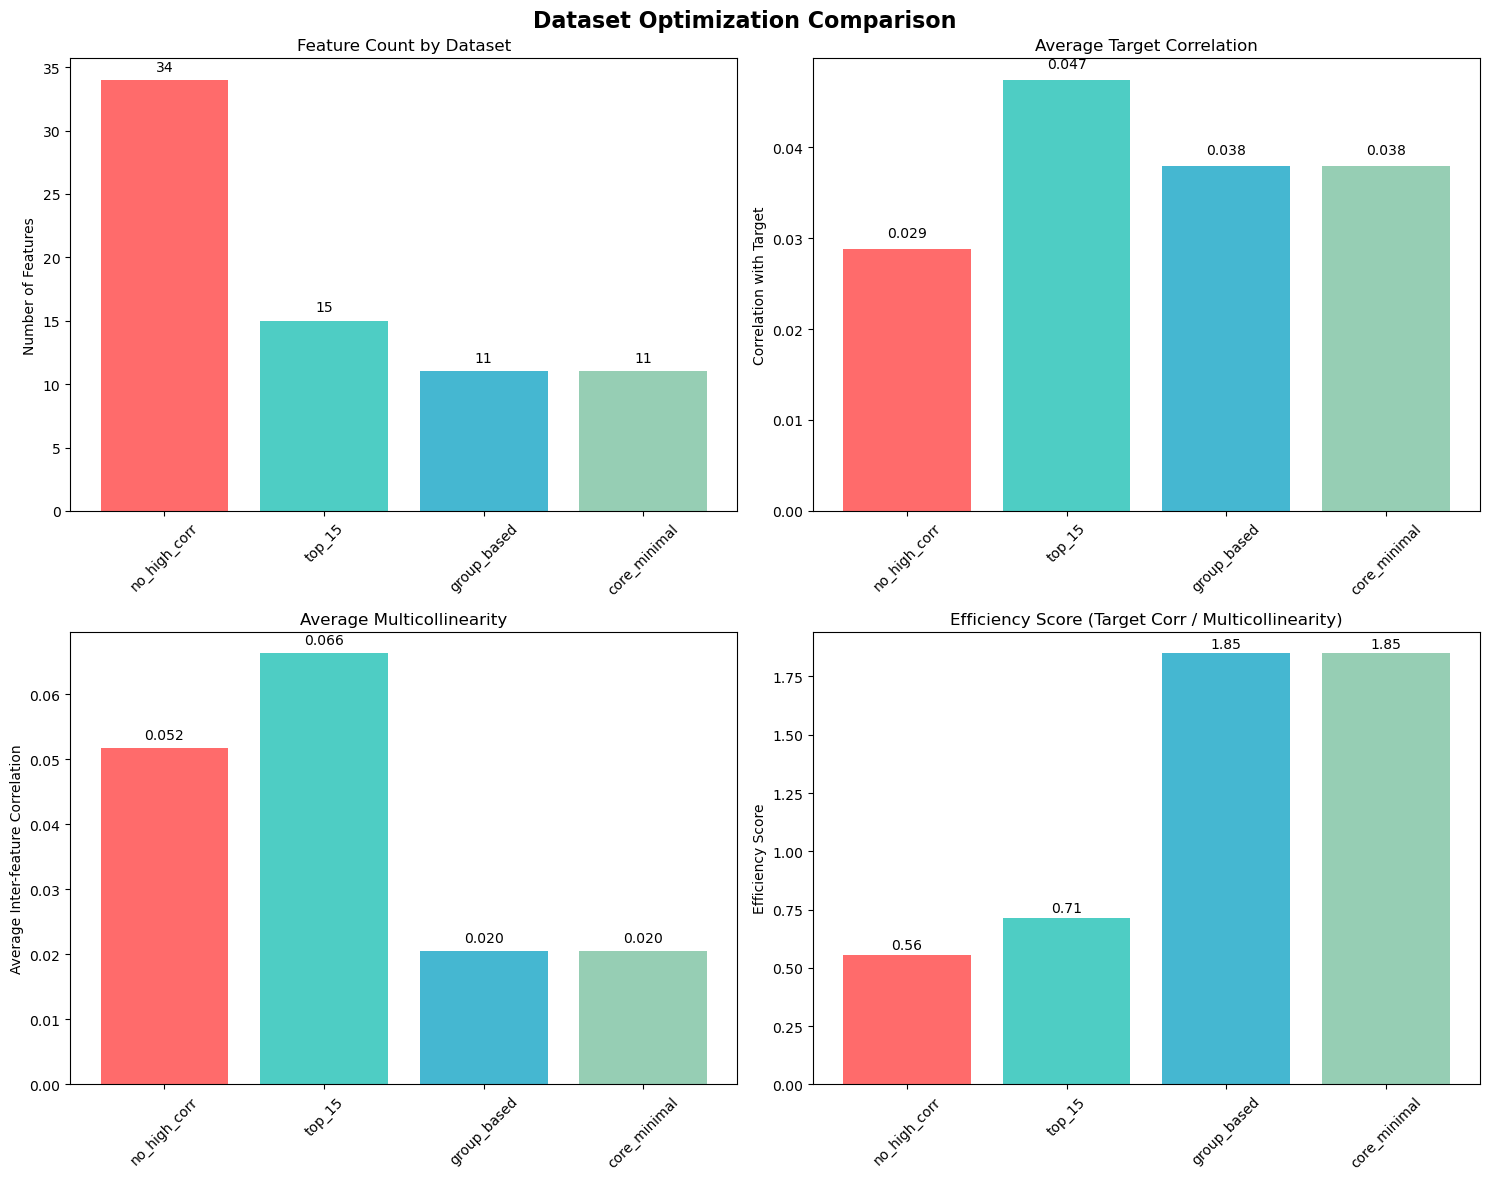


FINAL OPTIMIZATION SUMMARY
🎯 Original Dataset: 36 features
🎯 Target Variable: Daily_Usage_Hours
🎯 Total Samples: 3614 rows

📊 OPTIMIZED DATASETS CREATED:
1. NO_HIGH_CORR:
   📁 File: Students_Cleaned_Encoded_no_high_corr.csv
   📊 Features: 34
   🎯 Target correlation: 0.029
   🔗 Multicollinearity: 0.052
   ⚡ Efficiency score: 0.56

2. TOP_15:
   📁 File: Students_Cleaned_Encoded_top_15.csv
   📊 Features: 15
   🎯 Target correlation: 0.047
   🔗 Multicollinearity: 0.066
   ⚡ Efficiency score: 0.71

3. GROUP_BASED:
   📁 File: Students_Cleaned_Encoded_group_based.csv
   📊 Features: 11
   🎯 Target correlation: 0.038
   🔗 Multicollinearity: 0.020
   ⚡ Efficiency score: 1.85

4. CORE_MINIMAL:
   📁 File: Students_Cleaned_Encoded_core_minimal.csv
   📊 Features: 11
   🎯 Target correlation: 0.038
   🔗 Multicollinearity: 0.020
   ⚡ Efficiency score: 1.85

🏆 RECOMMENDATIONS:
1. 🥇 For initial modeling: 'top_15' dataset
2. 🥈 For production deployment: 'group_based' dataset
3. 🥉 For comprehensive analysi

In [13]:
# ===== FINAL VALIDATION AND VISUALIZATION =====
print("=" * 60)
print("FINAL VALIDATION AND VISUALIZATION")
print("=" * 60)

import matplotlib.pyplot as plt
import seaborn as sns

# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Dataset Optimization Comparison', fontsize=16, fontweight='bold')

# Plot 1: Feature count comparison
dataset_names = list(datasets.keys())
feature_counts = [len(dataset.columns) - 1 for dataset in datasets.values()]

axes[0, 0].bar(dataset_names, feature_counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0, 0].set_title('Feature Count by Dataset')
axes[0, 0].set_ylabel('Number of Features')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(feature_counts):
    axes[0, 0].text(i, v + 0.5, str(v), ha='center', va='bottom')

# Plot 2: Target correlation strength
target_corrs = []
for dataset in datasets.values():
    feature_cols = [col for col in dataset.columns if col != best_target]
    if feature_cols:
        corr_strength = dataset[feature_cols].corrwith(dataset[best_target]).abs().mean()
        target_corrs.append(corr_strength)
    else:
        target_corrs.append(0)

axes[0, 1].bar(dataset_names, target_corrs, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0, 1].set_title('Average Target Correlation')
axes[0, 1].set_ylabel('Correlation with Target')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(target_corrs):
    axes[0, 1].text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom')

# Plot 3: Multicollinearity comparison
multicollinearity_scores = []
for dataset in datasets.values():
    feature_cols = [col for col in dataset.columns if col != best_target]
    if len(feature_cols) > 1:
        corr_matrix = dataset[feature_cols].corr().abs()
        upper_triangle = []
        for i in range(len(feature_cols)):
            for j in range(i+1, len(feature_cols)):
                upper_triangle.append(corr_matrix.iloc[i, j])
        avg_multicollinearity = sum(upper_triangle) / len(upper_triangle) if upper_triangle else 0
        multicollinearity_scores.append(avg_multicollinearity)
    else:
        multicollinearity_scores.append(0)

axes[1, 0].bar(dataset_names, multicollinearity_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[1, 0].set_title('Average Multicollinearity')
axes[1, 0].set_ylabel('Average Inter-feature Correlation')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(multicollinearity_scores):
    axes[1, 0].text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom')

# Plot 4: Efficiency Score (Target Correlation / Multicollinearity)
efficiency_scores = []
for i in range(len(dataset_names)):
    if multicollinearity_scores[i] > 0:
        efficiency = target_corrs[i] / multicollinearity_scores[i]
    else:
        efficiency = target_corrs[i]  # If no multicollinearity, use target correlation
    efficiency_scores.append(efficiency)

axes[1, 1].bar(dataset_names, efficiency_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[1, 1].set_title('Efficiency Score (Target Corr / Multicollinearity)')
axes[1, 1].set_ylabel('Efficiency Score')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(efficiency_scores):
    axes[1, 1].text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print final summary
print("\n" + "=" * 60)
print("FINAL OPTIMIZATION SUMMARY")
print("=" * 60)

print(f"🎯 Original Dataset: {len(data.columns)} features")
print(f"🎯 Target Variable: {best_target}")
print(f"🎯 Total Samples: {len(data)} rows")
print()

print("📊 OPTIMIZED DATASETS CREATED:")
for i, (name, dataset) in enumerate(datasets.items(), 1):
    feature_count = len(dataset.columns) - 1
    target_corr = target_corrs[i-1]
    multicollinearity = multicollinearity_scores[i-1]
    efficiency = efficiency_scores[i-1]
    
    print(f"{i}. {name.upper()}:")
    print(f"   📁 File: Students_Cleaned_Encoded_{name}.csv")
    print(f"   📊 Features: {feature_count}")
    print(f"   🎯 Target correlation: {target_corr:.3f}")
    print(f"   🔗 Multicollinearity: {multicollinearity:.3f}")
    print(f"   ⚡ Efficiency score: {efficiency:.2f}")
    print()

print("🏆 RECOMMENDATIONS:")
print("1. 🥇 For initial modeling: 'top_15' dataset")
print("2. 🥈 For production deployment: 'group_based' dataset")
print("3. 🥉 For comprehensive analysis: 'no_high_corr' dataset")
print("4. 🎯 For quick prototyping: 'core_minimal' dataset")

print("\n✅ Dataset optimization complete! All files exported successfully.")
print("✅ Ready for machine learning model training and evaluation.")